In [7]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import random
import pandas as pd



### 1. Forward Propagation

<img src="Q1.jpg">

1.3

In [5]:
def Relu(X):
    # X is a array
    return X*(X>0)
def softmax(z):
    return np.exp(z)/(np.sum(np.exp(z),axis=1))[:,np.newaxis]
    
def ff_nn_2_ReLu(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    ### END CODE HERE ###
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    ### START CODE HERE ### (≈ 4 lines of code)
    Z1 = np.dot(X,W1) + b1
    A1 = Relu(Z1)
    Z2 = np.dot(A1,W2) + b2
    A2 = Relu(Z2)
    Z3 = np.dot(A2,W3) + b3
    yhat=softmax(Z3)
    
    ### END CODE HERE ###
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2,
              "Z3": Z3,}
    return yhat, cache

1.4

In [8]:
## parameters setting

X=[[1,-1],
  [0,-1],
  [0,1]]

W0=np.array([[1,-1,0],
            [0,0,0.5]])
W1=np.array([[1,-1],
            [0,-1],
            [0,0]])
W2=np.array([[1,0,-1],[1,0,-1]])

b0=np.array([0,0,1])
b1=np.array([1,-1])
b2=np.array([1,0,0])

paras={}
paras["W1"]=W0
paras["W2"]=W1
paras["W3"]=W2
paras["b1"]=b0
paras["b2"]=b1
paras["b3"]=b2



In [9]:
y_hat,cache_t=ff_nn_2_ReLu(X,paras)
y_hat

array([[ 0.94649912,  0.04712342,  0.00637746],
       [ 0.84379473,  0.1141952 ,  0.04201007],
       [ 0.84379473,  0.1141952 ,  0.04201007]])

### 2 Gradient Descent

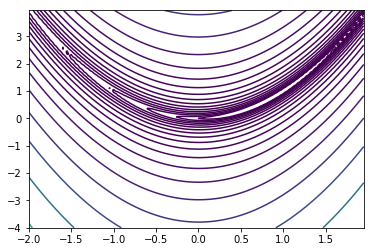

In [24]:
delta = 0.05
x = np.arange(-2, 2, delta)
y = np.arange(-4, 4, delta)
X, Y = np.meshgrid(x, y)
Z = (1-X)**2+100*(Y-X**2)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z,np.logspace(0,4,20,40,base=10))
plt.show()

In [25]:
def grad_f(vector):
    x, y = vector
    df_dx = 400*x**3-400*x*y+2*x-2 
    df_dy = 200*(y-x**2)
    return np.array([df_dx, df_dy])

def grad_descent(starting_point=None, iterations=10, learning_rate=0.005):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

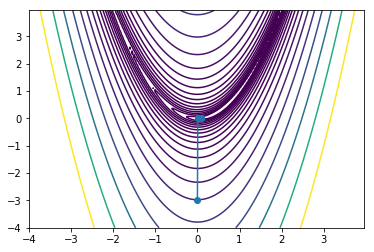

In [26]:
#learning rate =0.005
np.random.seed(10)
traj = grad_descent(starting_point=[0,-3], iterations=10, learning_rate=0.005)

delta = 0.05
x = np.arange(-4, 4, delta)
y = np.arange(-4, 4, delta)
X, Y = np.meshgrid(x, y)
Z = (1-X)**2+100*(Y-X**2)**2
fig, ax = plt.subplots()
CS=ax.contour(X, Y, Z,np.logspace(0,4,20,40,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')


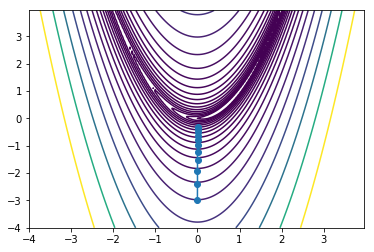

In [27]:
np.random.seed(10)
traj = grad_descent(starting_point=[0,-3], iterations=10, learning_rate=0.001)

delta = 0.05
x = np.arange(-4, 4, delta)
y = np.arange(-4, 4, delta)
X, Y = np.meshgrid(x, y)
Z = (1-X)**2+100*(Y-X**2)**2
fig, ax = plt.subplots()
CS=ax.contour(X, Y, Z,np.logspace(0,4,20,40,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

In [28]:
# gradient with momentum
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point is not None:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

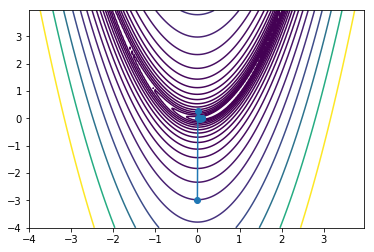

In [29]:
np.random.seed(10)
traj = grad_descent_with_momentum(starting_point=np.array([0,-3]), iterations=10, epsilon=0.005, alpha=.09)

delta = 0.05
x = np.arange(-4, 4, delta)
y = np.arange(-4, 4, delta)
X, Y = np.meshgrid(x, y)
Z = (1-X)**2+100*(Y-X**2)**2
fig, ax = plt.subplots()
CS=ax.contour(X, Y, Z,np.logspace(0,4,20,40,base=10))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### Q3



<img src="Q2.jpg">

#### 3.2 backprop to calculate gradient

In [16]:
def grad_f(params, X, y):
    W1= params["W1"]
    W2= params["W2"]
    W3= params["W3"]
    
    b1=params["b1"]
    b2=params["b2"]
    b3=params["b3"]
    

    
    Z1 = np.dot(X,W1) + b1
    A1 = Relu(Z1)
    Z2 = np.dot(A1,W2) + b2
    A2 = Relu(Z2)
    Z3 = np.dot(A2,W3) + b3
    y_hat=softmax(Z3)
    
    m=X.shape[0]
    dZ3=y_hat - y
    dW3=1/m*A2.T.dot(dZ3)
    db3=1/m*dZ3.sum(axis=0)
    dA2=dZ3.dot(W3.T)
    dZ2=dZ3.dot(W3.T)*(Z2>0)
    dW2=1/m*A1.T.dot(dZ2)
    db2=1/m*dZ2.sum(axis=0)
    dZ1=dZ2.dot(W2.T)*(Z1>0)
    dW1=1/m*X.T.dot(dZ1)
    db1=1/m*dZ1.sum(axis=0)
    grad_param={}
    grad_param["dW1"]=dW1
    grad_param["dW2"]=dW2
    grad_param["dW3"]=dW3
    grad_param["db1"]=db1
    grad_param["db2"]=db2
    grad_param["db3"]=db3
    return grad_param

#### 3.3 generating the data from bivariant guassian

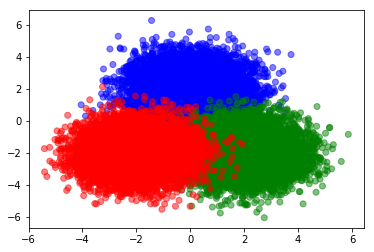

In [17]:
N_sample=10000

X1=list(np.random.multivariate_normal([0,2],[[1,0],[0,1]],N_sample))
color1=["blue" for i in range(N_sample)]
label1=[0 for i in range(N_sample)]
X2=np.random.multivariate_normal([2,-2],[[1,0],[0,1]],N_sample)
color2=["green" for i in range(N_sample)]
label2=[1 for i in range(N_sample)]
X3=np.random.multivariate_normal([-2,-2],[[1,0],[0,1]],N_sample)
color3=["red" for i in range(N_sample)]
label3=[2 for i in range(N_sample)]
X=np.concatenate((X1,X2,X3),axis=0)
Color=np.concatenate((color1,color2,color3),axis=0)
label=np.concatenate((label1,label2,label3),axis=0)

dt=pd.DataFrame(X)
dt["color"]=Color
dt["category"]=label
dt.columns=["x1","x2","color","category"]
import matplotlib.pyplot as plt
plt.scatter(dt["x1"], dt["x2"], c=dt["color"], alpha=0.5)
plt.show()

### 3.4 Gradient Descent to train the mode;

With the same learning rate 0.5, the momentum gradient descent is slightly faster

In [37]:
#gradient descent 
def update_parameters(parameters, grads, learning_rate,optimize=None):
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### 
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
 
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### 
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    dW3 = grads["dW3"]
    db3 = grads["db3"]
  
    
    # Update rule for each parameter
    ### START CODE HERE ### 
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    W3 = W3 - learning_rate*dW3
    b3 = b3 - learning_rate*db3
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                   "W3": W3,
                   "b3":b3}
    
    return parameters

def loss(y, y_hat):
    # cross entropy
    tot = y * np.log(y_hat)
    return  -tot.sum()



In [38]:

# GRADED FUNCTION: nn_model

def nn_model(X, Y, num_iterations = 10000, print_cost=False,learning_rate=1,optimize=None,beta=0.9):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    #initialize the parameters
    W1=np.random.rand(2,3)
    W2=np.random.rand(3,2)
    W3=np.random.rand(2,3)
    b1=np.zeros((1,3))
    b2=np.zeros((1,2))
    b3=np.zeros((1,3))
    
    parameters={}
    parameters["W1"]=W1
    parameters["W2"]=W2
    parameters["W3"]=W3   
    parameters["b1"]=b1
    parameters["b2"]=b2
    parameters["b3"]=b3  
 
    ### END CODE HERE ###
    costlist=[]
    # Loop (gradient descent)
    if optimize=="momentum":
        v = initialize_velocity(parameters)

    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        y_hat,cache = ff_nn_2_ReLu(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = loss(Y, y_hat)
        costlist.append(cost)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = grad_f(parameters, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        if optimize is None:
            parameters = update_parameters(parameters,grads,learning_rate)
        elif optimize=="momentum":
            #momentum:
            
            parameters,v=update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
        
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            #print ("Cost after iteration %i: %f" %(i, cost))
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters,costlist




##### split data to training and test dataset

In [39]:

import random
random.seed(123)


N_sample3=int(N_sample*3)

N_train=int(N_sample3*0.6)

N_test=N_sample3-N_train
train_index=list(set(random.sample(list(range(N_sample3)), N_train)))
test_index=list(set(list(range(N_sample3)))-set(random.sample(list(range(N_sample3)), N_train)))

X_train=dt.loc[train_index,["x1","x2"]].values
Y_train=np.zeros((N_train,3))
Y_train[np.arange(N_train),dt["category"].values[train_index]]=1

X_test=dt.loc[test_index,["x1","x2"]].values
Y_test=np.zeros((N_test,3))
Y_test[np.arange(N_test),dt["category"].values[test_index]]=1

##### train the model

In [40]:
#train
parameters_model,costlist=nn_model(X_train, Y_train, num_iterations = 1000, print_cost=False,learning_rate=0.5)
# prediction accuracy on test set:
pred_probs,cache=ff_nn_2_ReLu(X_test,parameters_model)
ac=sum((np.argmax(pred_probs, axis=1) == dt["category"].values[test_index]))/N_test
print("test accuracy is: "+str(ac))

test accuracy is: 0.970583333333


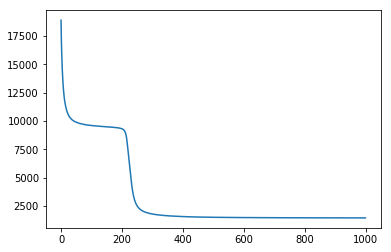

In [41]:

plt.plot(costlist)

#### 3.5 GD with Momentum


In [42]:
def initialize_velocity(parameters):
    """
    Initializes the velocity as a python dictionary with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    
    Returns:
    v -- python dictionary containing the current velocity.
                    v['dW' + str(l)] = velocity of dWl
                    v['db' + str(l)] = velocity of dbl
    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    
    # Initialize velocity
    for l in range(L):
        ### START CODE HERE ### (approx. 2 lines)
        v["dW" + str(l+1)] = np.zeros(parameters['W' + str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters['b' + str(l+1)].shape)
        ### END CODE HERE ###
        
    return v


In [43]:
def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    """
    Update parameters using Momentum
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- python dictionary containing the current velocity:
                    v['dW' + str(l)] = ...
                    v['db' + str(l)] = ...
    beta -- the momentum hyperparameter, scalar
    learning_rate -- the learning rate, scalar
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- python dictionary containing your updated velocities
    """

    L = len(parameters) // 2 # number of layers in the neural networks
    
    # Momentum update for each parameter
    for l in range(L):
        
        ### START CODE HERE ### (approx. 4 lines)
        # compute velocities
        v["dW" + str(l+1)] = beta*v["dW" + str(l+1)] + (1-beta)*grads["dW" + str(l+1)]
        v["db" + str(l+1)] = beta*v["db" + str(l+1)] + (1-beta)*grads["db" + str(l+1)]
        # update parameters
        parameters["W" + str(l+1)] = parameters['W' + str(l+1)] - learning_rate*v['dW' + str(l+1)]
        parameters["b" + str(l+1)] = parameters['b' + str(l+1)] - learning_rate*v['db' + str(l+1)]
        ### END CODE HERE ###
        
    return parameters, v

In [44]:

# GRADED FUNCTION: nn_model

def nn_model(X, Y, num_iterations = 1000, print_cost=False,learning_rate=0.5,optimize=None,beta=0.8):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(123)
    #initialize the parameters
    W1=np.random.rand(2,3)
    W2=np.random.rand(3,2)
    W3=np.random.rand(2,3)
    b1=np.zeros((1,3))
    b2=np.zeros((1,2))
    b3=np.zeros((1,3))
    
    parameters={}
    parameters["W1"]=W1
    parameters["W2"]=W2
    parameters["W3"]=W3   
    parameters["b1"]=b1
    parameters["b2"]=b2
    parameters["b3"]=b3  
 
    ### END CODE HERE ###
    costlist=[]
    # Loop (gradient descent)
    v = initialize_velocity(parameters)

    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        y_hat,cache = ff_nn_2_ReLu(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = loss(Y, y_hat)
        costlist.append(cost)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = grad_f(parameters, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        if optimize is None:
            parameters = update_parameters(parameters,grads,learning_rate)
        elif optimize=="momentum":
            #momentum:
            
            parameters,v=update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
        
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if print_cost and i % 100 == 0:
            #print ("Cost after iteration %i: %f" %(i, cost))
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters,costlist



In [45]:
#train with momentum
parameters_new,costlist=nn_model(X_train, Y_train, num_iterations=1000, print_cost=False,learning_rate=0.5,optimize="momentum",beta=0.9)
# prediction accuracy on test set:
pred_probs,cache=ff_nn_2_ReLu(X_test,parameters_new)
ac=sum((np.argmax(pred_probs, axis=1) == dt["category"].values[test_index]))/N_test
print("test accuracy is: "+str(ac))



test accuracy is: 0.97025


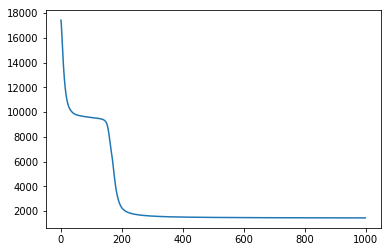

In [46]:
#cost track
plt.plot(costlist)